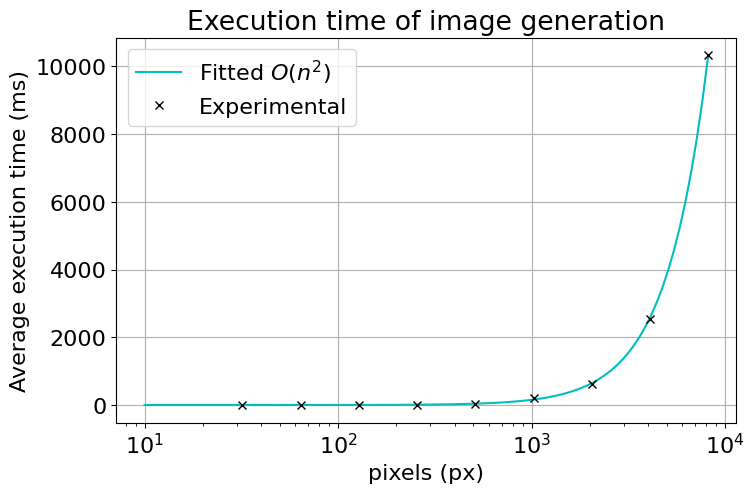

In [12]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
plt.rcParams['font.size'] = 16

data = pd.read_csv("mandelbrot_times.csv")
X_exp = data['Size']
Y_exp = data['Time(ns)']/data['repetitions'] / 10**6

params, covariance = curve_fit(lambda n,a : a*n**2, X_exp, Y_exp)
X_fit = np.logspace(1, math.log(max(X_exp), 10), 100)
Y_fit = X_fit**2 * params[0]

plt.figure(figsize=(8, 5))
plt.semilogx(X_fit, Y_fit, 'c-', label=r"Fitted $O(n^2)$")
plt.semilogx(X_exp, Y_exp, 'kx', label="Experimental")
plt.title("Execution time of image generation")
plt.xlabel("pixels (px)")
plt.ylabel("Average execution time (ms)")
plt.grid(True)
plt.legend()
plt.show()